# 中國時報近期30篇新聞分析

In [2]:
#encoding=utf-8
#import package we need to use.
import requests
from bs4 import BeautifulSoup

In [3]:
#從Google瀏覽器的檢查可以知道取得html要用get方法以及需要的網址
url = 'http://www.chinatimes.com/politic/total/'
res = requests.get(url)
#確定可以讀取到網頁
res.status_code

200

In [4]:
#把政治文章列表頁中每一篇文章的網址擷取出來
soup = BeautifulSoup(res.text, 'html.parser')
url_list = []
for s in soup.find(class_='news-list').find_all(class_="clear-fix"):
    url_list.append(s.find('a')['href'])

In [5]:
#發現最後一筆會是下一頁的url
soup.find(class_='news-list').find_all(class_="clear-fix")[-1].find('a')['href']

'/politic/total/?page=2'

In [6]:
#嘗試把整篇文章整理出來(去除<p>等Tag標籤)
bs_temp = BeautifulSoup(requests.get(url_list[0]).text, 'html.parser')
article = ''
for line in bs_temp.find_all('article')[0].find_all('p'):
    article = line.text+article
print(article)

(中時電子報)網友酸說：「總統很温暖。中間隔著拒馬，內心卻接近我。」、「嗯，好接近。蛇籠、拒馬、維安人牆、還有計畫加高的府邸圍牆...真的好接近，接近到很確定人民翻不到她的桌、憤怒的鞋砸不到她、人民的聲音她可以充耳不聞。」、「莫非是魔神仔。」、「真的都不知道妳在接近，尤其拒馬那麼多、那麼高！」蔡英文說，擔任民進黨主席之前，比較不會主動跟人家聊天，但做了黨主席之後，就開始要聊天，展現領導人對他人的真誠關懷。而當了總統之後，很多事阻絕了她跟民眾之間直接的接觸，因此她才覺得應該要在花蓮震後跟他們面對面，聽聽花蓮人怎麼說，並告訴他們不要擔心。蔡總統無奈說，她知道人民很想要知道總統在想什麼，幕僚就會替她寫成稿子，讓她在群眾面前唸出來，文字優美、內容豐富，但總統表情嚴肅，民眾印象不深刻，總統好像沒個性。蔡總統接受年代新聞台專訪時說，行政團隊應該站在第一線去表現、擔起責任，那她可以站在後面，看哪些地方需要補強，哪些地方需要她的協助；而不是總統老是擋在前面，行政團隊躲在總統後面。因此久而久之，就有人會覺得總統好像不見了。蔡英文總統執政以來，遇到爭議問題，都只派發言人出面，更因臉書治國、推特外交，而被外界封為「神隱少女」。她今天接受電視訪問時對此終於說出原因，「其實我是接近的，只是你不知道我在接近你而已。」這樣的說法不禁讓網友臉上出現三條線。


In [7]:
#把每一篇整理好的文章存在article_list裡
article_list = []
for i in range(len(url_list)-1):
    bs_temp = BeautifulSoup(requests.get(url_list[i]).text, 'html.parser')
    article = ''
    for line in bs_temp.find_all('article')[0].find_all('p'):
        article = line.text+article
    article_list.append(article)

In [8]:
print('We have '+str(len(article_list))+' articles.')

We have 30 articles.


In [9]:
#嘗試把文章以逗號分句
article_list[0].split('，')

['(中時電子報)網友酸說：「總統很温暖。中間隔著拒馬',
 '內心卻接近我。」、「嗯',
 '好接近。蛇籠、拒馬、維安人牆、還有計畫加高的府邸圍牆...真的好接近',
 '接近到很確定人民翻不到她的桌、憤怒的鞋砸不到她、人民的聲音她可以充耳不聞。」、「莫非是魔神仔。」、「真的都不知道妳在接近',
 '尤其拒馬那麼多、那麼高！」蔡英文說',
 '擔任民進黨主席之前',
 '比較不會主動跟人家聊天',
 '但做了黨主席之後',
 '就開始要聊天',
 '展現領導人對他人的真誠關懷。而當了總統之後',
 '很多事阻絕了她跟民眾之間直接的接觸',
 '因此她才覺得應該要在花蓮震後跟他們面對面',
 '聽聽花蓮人怎麼說',
 '並告訴他們不要擔心。蔡總統無奈說',
 '她知道人民很想要知道總統在想什麼',
 '幕僚就會替她寫成稿子',
 '讓她在群眾面前唸出來',
 '文字優美、內容豐富',
 '但總統表情嚴肅',
 '民眾印象不深刻',
 '總統好像沒個性。蔡總統接受年代新聞台專訪時說',
 '行政團隊應該站在第一線去表現、擔起責任',
 '那她可以站在後面',
 '看哪些地方需要補強',
 '哪些地方需要她的協助；而不是總統老是擋在前面',
 '行政團隊躲在總統後面。因此久而久之',
 '就有人會覺得總統好像不見了。蔡英文總統執政以來',
 '遇到爭議問題',
 '都只派發言人出面',
 '更因臉書治國、推特外交',
 '而被外界封為「神隱少女」。她今天接受電視訪問時對此終於說出原因',
 '「其實我是接近的',
 '只是你不知道我在接近你而已。」這樣的說法不禁讓網友臉上出現三條線。']

In [10]:
import jieba
import pandas as pd
jieba.set_dictionary('dict.txt')

In [11]:
#定義切文章成詞組的函數，input為儲存有文章中每一句話的list和用來儲存詞組的dict，並輸出該dict
#input:
    # d為存有數句話的list
def text_cut(d, dic_vector):
    for article in d:
        seg_list = jieba.cut(article,cut_all=False) 
        string_list = "|".join(seg_list).split('|')
        for s in string_list:
            if not (s in dic_vector.keys()):
                dic_vector[s] = 1
            else:
                dic_vector[s] += 1
    return dic_vector

In [12]:
#嘗試將一篇文章斷詞
div_vector = {}
div_vector = text_cut(article_list[0].split('，'),div_vector)
df_test = pd.DataFrame(div_vector,index = [0])
df_test

Building prefix dict from C:\Users\User\dict.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.u1c553450663016aca9f19b39879c276b.cache
Loading model cost 0.635 seconds.
Prefix dict has been built succesfully.


,(,),...,、,。,「,」,一線,三條線,上,...,面前,面對面,鞋砸,領導人,高,魔神仔,黨主席,！,：,；
0,1,1,1,12,13,6,6,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [13]:
# t 為「儲存每一篇文章中的每一句話的list」的list， ttolines為儲存文章中每一句話的list
t = []
for article in article_list:
    ttolines = []
    for line in article.split('，'):
        ttolines.append(line)
    t.append(ttolines)

In [14]:
div_vector = {}
div_vector = text_cut(t[0],div_vector)
df = pd.DataFrame(div_vector,index = [0])
#把每一篇文章中的句子切成詞組並存進DataFrame裡
for i in range(1,len(t)):
    div_vector = {}
    div_vector = text_cut(t[i],div_vector)
    temp_df = pd.DataFrame(div_vector,index=[0])
    #把不同篇文章的詞組以columns連接起來
    df = pd.concat([df,temp_df],ignore_index=True)
#把缺失值用0替代
df = df.fillna(0)

In [15]:
print(df.columns.tolist()[0:86])

[' ', '(', ')', ',', '...', '00', '01', '1', '10', '10.9%', '1000', '105', '106', '107', '109', '11', '1100', '12', '13', '14', '15', '150', '16', '1603', '17', '17.8', '18', '19', '1978', '1979', '1992', '1998', '2', '2.8', '20', '20.2', '2000', '2002', '2004', '2006', '2010', '2011', '2014', '2015', '2018', '2019', '2020', '21', '22', '22.8', '23', '23.8', '25.6', '26', '27', '29', '3', '30', '31', '33', '33.2%', '34.2%', '35', '38990', '39', '4', '40', '400', '44', '45', '45%', '5', '500', '51', '6', '63', '7', '70', '7000', '74%', '8', '9', '96', ':', ';', '?']


In [16]:
#Remove stop word
stopword = ['你','我','他','的','也','有','在','與','不','一','年','月','日','人','讓','為','都','天','是','說','會','但','要','她','對','了','就','做','很','及','等','表示','意見','新','將','沒有','努力','預計','一個','而','這是','別人','必須','大家','過','這','於','後','這次','因為','又','向','只是','但是']
punc = [' ','(',')',',','！','（','）','：','；','？','。','「','」','、','…','→','《','》']
politics_stop = ['台灣']
numbers = df.columns[0:86].tolist() #透過直接觀察columns得知(應可替換成用程式判斷)
df_clean = df.drop(stopword+punc+politics_stop+numbers,axis=1)
print(df_clean.columns.tolist())
print(len(df_clean.columns.tolist()))

['CI04', 'CSIS', 'Diamond', 'Francis', 'Fukuyama', 'Google', 'Larry', 'MOU', 'PM2.5', 'PO', 'POP', 'Tesla', '一些', '一份力', '一位', '一切', '一到', '一半', '一哩路', '一子', '一定', '一家', '一家接', '一己', '一年', '一想', '一旁', '一日', '一條龍', '一樣', '一次', '一生', '一碗', '一筆', '一線', '一職', '一致', '一起', '一項', '一點', '一齊', '丁守中', '三', '三井', '三人', '三年', '三條線', '三部曲', '上', '上任', '上市', '上陣', '上面', '下', '下一代', '下午', '下去', '下台', '下屆', '下次', '下降', '不以', '不但', '不佳', '不僅', '不准', '不到', '不勝', '不可', '不可能', '不同', '不宜', '不容', '不小', '不少', '不得', '不想', '不應', '不應該', '不敢', '不敢講', '不斷', '不時', '不會', '不準', '不滿', '不甘示弱', '不用', '不當', '不知', '不知好歹', '不禁', '不等值', '不算話', '不管', '不給', '不能', '不良', '不要', '不見了', '不計', '不談', '不論', '不過', '不選', '不領', '且', '世代', '世界', '並', '並且', '並到', '並向', '並在', '並將', '並無', '並肩', '並與', '並讓', '並非', '中', '中出', '中午', '中國', '中國城', '中執會', '中天', '中央', '中央山脈', '中央社', '中寮', '中心', '中所', '中時', '中段班', '中生代', '中盡', '中立', '中華', '中華民國', '中評網', '中進', '中部', '主任', '主動', '主委', '主席', '主張', '主持', '主持人', '主管', '主義', '主要', '久而久之', '之', '之上', '之中'

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

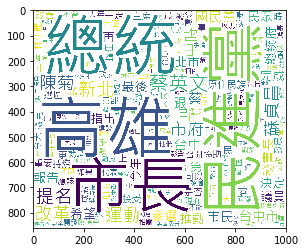

In [18]:
#把清洗後的不同文章中的文檔詞組加總作出近期熱門關鍵字
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(df_clean.sum(axis=0).to_dict())
plt.imshow(wordcloud)
plt.show()

In [19]:
#對標點符號以外詞組做TF-IDF
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(df_clean.values)  
df_tfidf = pd.DataFrame(tfidf.toarray(), columns = df_clean.columns.tolist())

In [20]:
#輸出第page篇本文，並以Threshold作為篩選閾值，輸出用於製作word cloud之Dictionary
def forWC(df_tfidf,page,threshold):
    return df_tfidf[page-1:page][df_tfidf[page-1:page]>threshold].dropna(axis=1).to_dict(orient='records')[0]

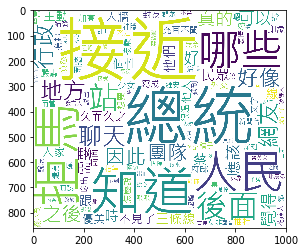

In [21]:
#第一篇文本
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(forWC(df_tfidf,1,0.05))
plt.imshow(wordcloud)
plt.show()

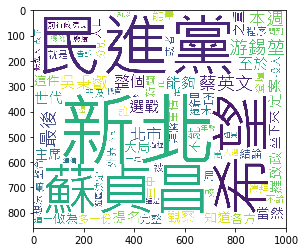

In [22]:
#第二篇文本
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(forWC(df_tfidf,2,0.05))
plt.imshow(wordcloud)
plt.show()

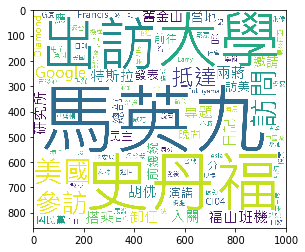

In [23]:
#第三篇文本
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(forWC(df_tfidf,3,0.05))
plt.imshow(wordcloud)
plt.show()

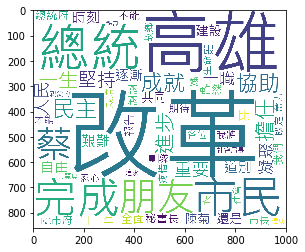

In [24]:
#第四篇文本
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(forWC(df_tfidf,4,0.05))
plt.imshow(wordcloud)
plt.show()

# 自由時報近期30篇新聞分析

In [25]:
res = requests.get('http://news.ltn.com.tw/list/breakingnews/politics')
#確定可以讀取到網頁
res.status_code

200

In [26]:
soup2 = BeautifulSoup(res.text, 'html.parser')
#每一篇文章
soup2.find('ul',class_='imm').find_all('li')[0]
#每一篇文章的網址
soup2.find('ul',class_='imm').find_all('li')[0].find('a',class_='tit')['href']
url_list2 = []
for s in soup2.find('ul',class_='imm').find_all('li'):
    url_list2.append(s.find('a',class_='tit')['href'])

In [27]:
article_list2 = []
for url in url_list2:
    soup_temp = BeautifulSoup(requests.get(url).text, 'html.parser')
    p_temp = ''
    for p in soup_temp.find('div',class_='text').find_all('p'):
        p_temp = p_temp+p.text
    article_list2.append(p_temp)
article_list2

['〔駐美特派員曹郁芬／華府九日報導〕針對美國國務院近期可望宣佈以商售方式協助台灣建造潛艦，國務院一位發言人表示，雖然美國商售的出口執照受到較嚴格的限制，但廣義而言，美國對台軍售是受到台灣關係法的指導以及依法對台灣防衛需求所做的評估。另一位了解美台軍事關係的美方人士指出，美商早就已經在協助台灣海龍潛艦的維修與延壽。國防部通知美國國會有意售台MK48-AT魚雷，再加上美國已售台可以由潛艦發射的魚叉飛彈，這是美國支持台灣潛艦武器戰鬥系統的一個指標。如今，美國再批准商售出口執照，是一致性的怍法，美國批准商售的出口執照是台灣潛艦國造的一個里程碑，但並非美國對台軍售的戲劇性變化。美國國防部官網去年4月25日發布的合約披露，波音公司將提供台灣海軍派里級FFG-7級船舶發射魚叉反艦導彈的技術（Harpoon Missile TARTAR） ，部分工程還將在高雄實施，預計在2018年12月完成。國務院發言人在回覆媒體的電郵中表示，美國對台軍售在7任美國政府都是一致的。美國會繼續不斷檢視台灣的防衛需求，但這位官員並未證實美國將以商售方式協助台灣造艦。長期研究美國對台軍售的前美國國會研究服務處研究員簡淑賢指出，川普政府做出這個決定代表白宮終於從弱化的國務院，尤其是東亞局手中拿回外交政策主導權。簡淑賢受訪時表示，如果回顧小布希政府同意出售8艘柴油潛艦以及台灣朝野政黨的惡鬥的歷史來看，川普政府確實踏出了重要一步，代表美國行政部門決定協助台灣的潛艦國造計劃，而且認為這符合美國的利益。她認為，這只是同意美國廠商可以開始跟台灣海軍就軟體、戰鬥系統與系統整合討論潛在的技術合作，未來還有長路要走。她期待川普政府做出調整已久，國務院去年對台灣潛艦國造要求技術協助還給予矛盾的答覆，不斷改變立場，一再猶豫，讓國務院看來很弱，而且似乎沒有完全掌握情況。簡淑賢說，從潛艦案學到的教訓是台灣失去了建造自我防禦能力的時機，台灣需要盡快強化國防能力。而且從慶富造船案來看，要美國進一步協助，台灣需要證明自己是個值得信任的夥伴，能保護美國的機密。美商早就協助台灣潛艦維修與延壽，如今再批准商售出口執照，作法一致，批准出口執照是台灣潛艦國造的一個里程碑，但並非美國對台軍售的戲劇性變化。圖為台灣的海龍級潛艦。（資料照）',
 '美國國務院回應對台軍售是根據台灣關係法依法進行。圖為台灣現役的海虎號潛艦。（資料照）〔即時新聞／綜合

In [28]:
# t2 為「儲存每一篇文章中的每一句話的list」的list， ttolines為儲存文章中每一句話的list
t2 = []
for article in article_list2:
    ttolines2 = []
    for line in article.split('，'):
        ttolines2.append(line)
    t2.append(ttolines2)
t2

[['〔駐美特派員曹郁芬／華府九日報導〕針對美國國務院近期可望宣佈以商售方式協助台灣建造潛艦',
  '國務院一位發言人表示',
  '雖然美國商售的出口執照受到較嚴格的限制',
  '但廣義而言',
  '美國對台軍售是受到台灣關係法的指導以及依法對台灣防衛需求所做的評估。另一位了解美台軍事關係的美方人士指出',
  '美商早就已經在協助台灣海龍潛艦的維修與延壽。國防部通知美國國會有意售台MK48-AT魚雷',
  '再加上美國已售台可以由潛艦發射的魚叉飛彈',
  '這是美國支持台灣潛艦武器戰鬥系統的一個指標。如今',
  '美國再批准商售出口執照',
  '是一致性的怍法',
  '美國批准商售的出口執照是台灣潛艦國造的一個里程碑',
  '但並非美國對台軍售的戲劇性變化。美國國防部官網去年4月25日發布的合約披露',
  '波音公司將提供台灣海軍派里級FFG-7級船舶發射魚叉反艦導彈的技術（Harpoon Missile TARTAR） ',
  '部分工程還將在高雄實施',
  '預計在2018年12月完成。國務院發言人在回覆媒體的電郵中表示',
  '美國對台軍售在7任美國政府都是一致的。美國會繼續不斷檢視台灣的防衛需求',
  '但這位官員並未證實美國將以商售方式協助台灣造艦。長期研究美國對台軍售的前美國國會研究服務處研究員簡淑賢指出',
  '川普政府做出這個決定代表白宮終於從弱化的國務院',
  '尤其是東亞局手中拿回外交政策主導權。簡淑賢受訪時表示',
  '如果回顧小布希政府同意出售8艘柴油潛艦以及台灣朝野政黨的惡鬥的歷史來看',
  '川普政府確實踏出了重要一步',
  '代表美國行政部門決定協助台灣的潛艦國造計劃',
  '而且認為這符合美國的利益。她認為',
  '這只是同意美國廠商可以開始跟台灣海軍就軟體、戰鬥系統與系統整合討論潛在的技術合作',
  '未來還有長路要走。她期待川普政府做出調整已久',
  '國務院去年對台灣潛艦國造要求技術協助還給予矛盾的答覆',
  '不斷改變立場',
  '一再猶豫',
  '讓國務院看來很弱',
  '而且似乎沒有完全掌握情況。簡淑賢說',
  '從潛艦案學到的教訓是台灣失去了建造自我防禦能力的時機',
  '台灣需要盡快強化國防能力。而且從慶富造船案來看',
  '要美國進一步協助',
  '台

In [29]:
div_vector2 = {}
div_vector2 = text_cut(t2[0],div_vector2)
df2 = pd.DataFrame(div_vector2,index = [0])
#把每一篇文章中的句子切成詞組並存進DataFrame裡
for i in range(1,len(t2)):
    div_vector2 = {}
    div_vector2 = text_cut(t2[i],div_vector2)
    temp_df = pd.DataFrame(div_vector2,index=[0])
    #把不同篇文章的詞組以columns連接起來
    df2 = pd.concat([df2,temp_df],ignore_index=True)
#把缺失值用0替代
df2 = df2.fillna(0)
print(df2.columns.tolist())

['\r\n', ' ', '-', '...', '1', '10', '104', '106', '11', '12', '16', '19', '1978', '1979', '2', '2010', '2013', '2015', '2018', '206', '25', '3', '38990', '4', '40', '41', '5', '57.5', '6', '60%', '7', '8', '8990', '9', '90', '91.7', '96', 'AT', 'CSIS', 'Committee', 'Commons', 'Education', 'FFG', 'Graham', 'Harpoon', 'House', 'LINE', 'MK48', 'Missile', 'Select', 'Stuart', 'TARTAR', 'TRA', 'google', 'of', '、', '。', '《', '》', '「', '」', '〔', '〕', 'ㄟ', '一', '一下', '一些', '一件', '一位', '一來一往', '一個', '一再', '一切', '一句', '一同', '一堆', '一天', '一定', '一家親', '一己', '一想', '一月', '一樣', '一次', '一步', '一段', '一生', '一直', '一種', '一職', '一致', '一致性', '一貫', '一起', '一部分', '一點', '一齊', '七堵區', '七股', '三十年', '三屆', '三思', '三類', '上', '上前', '上週', '下', '下一代', '下午', '下去', '下屆', '下議院', '不', '不一定', '不作', '不僅', '不出', '不到', '不勝', '不同', '不容', '不忘', '不想', '不應該', '不敢', '不斷', '不會', '不準', '不滿', '不爽', '不用', '不當', '不知', '不知好歹', '不算', '不能', '不行', '不要', '不計', '不該', '不論', '不諱', '不過', '不選', '且', '世代', '世大運', '並', '並且', '並將', '並未', '並非', '中', '中午', 

In [30]:
#Remove stop word
stopword2 = ['你','我','他','的','也','有','在','與','不','一','年','月','日','人','讓','為','都','天','是','說','會','但','要','她','對','了','就','做','很','及','等','表示','意見','新','將','沒有','努力','預計','一個','而','這是','別人','必須','大家','過','這','於','後','這次','因為','又','向','只是','但是','認為','今天','能夠','可以','新聞','被','對於','到','市','上','和']
punc2 = [' ','！','（','）','〔','〕','：','；','？','。','「','」','、','《','》','／']
politics_stop2 = ['台灣']
numbers2 = df2.columns[0:37].tolist() #透過直接觀察columns得知(應可替換成用程式判斷)
df2_clean = df2.drop(stopword2+punc2+politics_stop2+numbers2,axis=1)
print(df2_clean.columns.tolist())
print(len(df2_clean.columns.tolist()))

['AT', 'CSIS', 'Committee', 'Commons', 'Education', 'FFG', 'Graham', 'Harpoon', 'House', 'LINE', 'MK48', 'Missile', 'Select', 'Stuart', 'TARTAR', 'TRA', 'google', 'of', 'ㄟ', '一下', '一些', '一件', '一位', '一來一往', '一再', '一切', '一句', '一同', '一堆', '一天', '一定', '一家親', '一己', '一想', '一月', '一樣', '一次', '一步', '一段', '一生', '一直', '一種', '一職', '一致', '一致性', '一貫', '一起', '一部分', '一點', '一齊', '七堵區', '七股', '三十年', '三屆', '三思', '三類', '上前', '上週', '下', '下一代', '下午', '下去', '下屆', '下議院', '不一定', '不作', '不僅', '不出', '不到', '不勝', '不同', '不容', '不忘', '不想', '不應該', '不敢', '不斷', '不會', '不準', '不滿', '不爽', '不用', '不當', '不知', '不知好歹', '不算', '不能', '不行', '不要', '不計', '不該', '不論', '不諱', '不過', '不選', '且', '世代', '世大運', '並', '並且', '並將', '並未', '並非', '中', '中午', '中國', '中央', '中央社', '中客', '中小企業', '中山區', '中方', '中正區', '中盡', '中美', '中美三', '中說', '中風', '主任', '主委', '主導權', '主席', '主持', '主持人', '主權', '主管', '主編', '之', '之上', '之力', '之外', '之後', '之重', '之間', '之餘', '九日', '了解', '事', '事件', '事先', '事宜', '事實', '事後還', '事情', '事時', '二人', '二十多年', '二次', '互利', '互動', '互惠', '互相', '互補性', '互

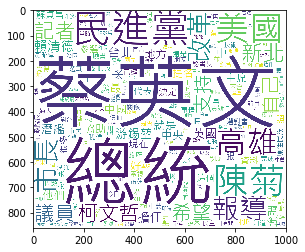

In [31]:
#把清洗後的不同文章中的文檔詞組加總作出近期熱門關鍵字
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(df2_clean.sum(axis=0).to_dict())
plt.imshow(wordcloud)
plt.show()

In [32]:
tfidf2 = transformer.fit_transform(df2_clean.values)  
df_tfidf2 = pd.DataFrame(tfidf2.toarray(), columns = df2_clean.columns.tolist())

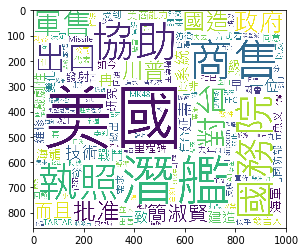

In [33]:
#第一篇文本
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(forWC(df_tfidf2,1,0.03))
plt.imshow(wordcloud)
plt.show()

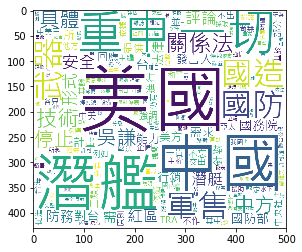

In [34]:
#第二篇文本
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=500, height=430, margin=2)
wordcloud.fit_words(forWC(df_tfidf2,2,0.03))
plt.imshow(wordcloud)
plt.show()

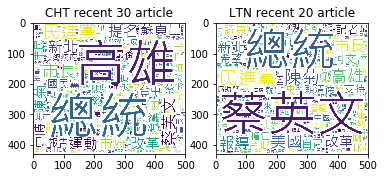

In [35]:
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=500, height=430, margin=2)
wordcloud.fit_words(df_clean.sum(axis=0).to_dict())
plt.subplot(121)
plt.title("CHT recent 30 article")
plt.imshow(wordcloud)
wordcloud.fit_words(df2_clean.sum(axis=0).to_dict())
plt.subplot(122)
plt.title("LTN recent 20 article")
plt.imshow(wordcloud)
plt.show()

## 預計想觀察政治風格較為鮮明(?)的兩大黨報(?)最近在政治版上在聊些什麼

#### 在看中國時報的文字雲時，最突出的是「高雄」以及「總統」兩個關鍵詞，另外還有許多政治人物的名字以及「民進黨」，我本來想說是不是都是在罵民進黨呢(?)。但是後來做了自由時報的文字雲發現關鍵字其實也是「總統」和「民進黨」我才發現原來是因為執政黨的關係，國民黨的聲勢目前是比較小的。另外在自由時報看到了「美國」這個關鍵字，後來觀察幾篇單篇文章後發現是跟軍售案有關。